# Analísis de la data de precipitación

Como se comentó en el cuaderno anterior se leerá la data de precipitación para compararla. 

In [2]:
from pathlib import Path
import wradlib as wrl
import matplotlib.pyplot as plt
import numpy as np
import warnings 

import Bases_GUI as radar
import utilidades as util

from scipy.stats import mode

warnings.filterwarnings('ignore')

Para compararlos usaremos tres pequeños datos. El primero de ellos será de un dato de clutter común, mientras que los otros dos representarán precipitación sobre y fuera la zona de clutter respectivamente.

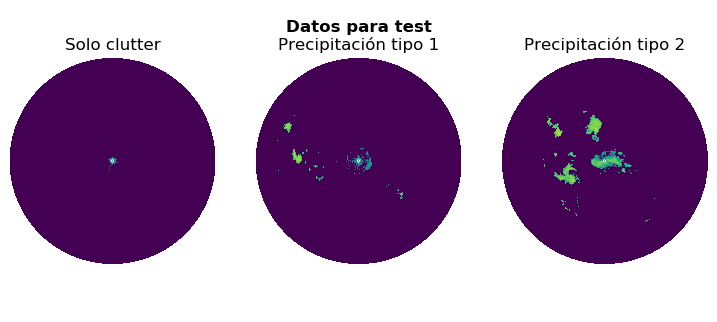

In [3]:
datos, titles = util.testeo(explore=True, rmax=100)

Y los veremos en detalle ...

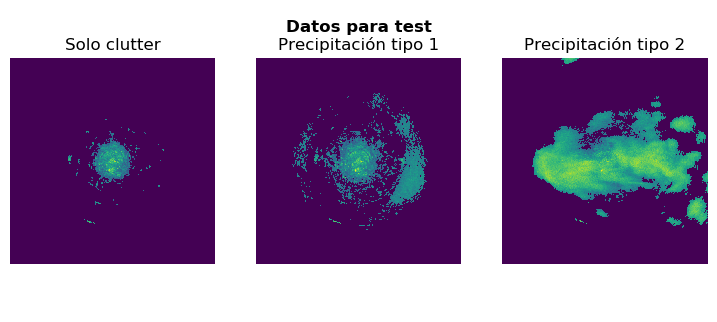

In [4]:
datos, titles = util.testeo(explore=True, rmax=20)

Se observa claramente que en el segundo ejemplo la precipitación se encuentra prácticamente fuera de la zona de clutter, mientras que en la "Precipitación tipo 2" una de las nubes de precipitación se encuentra sobre ella. Además, note que una porción de la textura de "Solo clutter" se encuentra en los datos de "Precipitación tipo 2". Realizamos un acercamiento más.

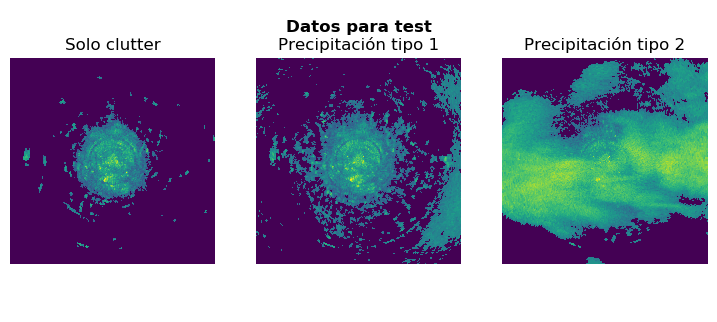

In [5]:
datos, titles = util.testeo(explore=True, rmax=10)

Presentamos la distribución de los datos para cada ejemplo.

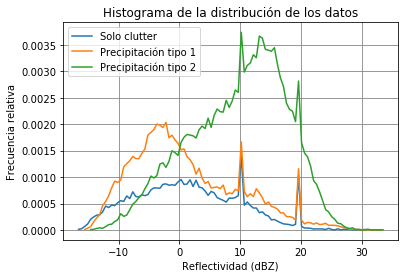

In [6]:
for index,data in enumerate(datos):
    unique, counts = np.unique(data, return_counts=True)
    counts = counts / (360 * 1000 )
    plt.plot(unique[1:], counts[1:], label=titles[index])

plt.title('Histograma de la distribución de los datos')
plt.xlabel('Reflectividad (dBZ)')
plt.ylabel('Frecuencia relativa')
plt.legend(loc='upper left')
plt.grid(color='gray')

Calcularemos ahora su textura. 

In [7]:
texture3, texture5 = [], []
texture3gab, texture5gab = [], []
texture3azi, texture5azi = [], []
texture3gaba, texture5gaba = [], []

In [8]:
for data in datos:
    texture3.append(util.texture(data, 1))
    texture5.append(util.texture(data, 2))
    texture3gab.append(util.pseudo_gabella(data, half_wsize=1,thr=6))
    texture5gab.append(util.pseudo_gabella(data, half_wsize=2, thr=6))

Mostramos los resultados:

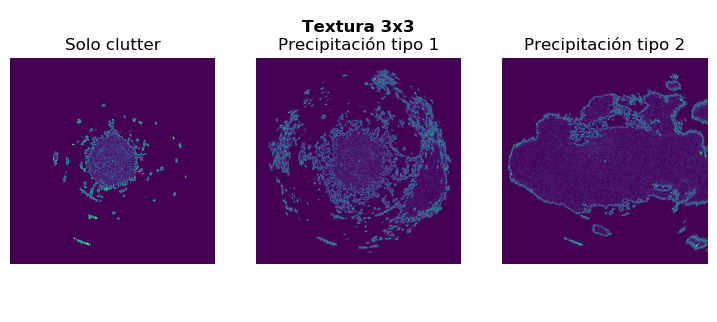

In [9]:
util.testeo_results(cluttermaps=None, results=texture3, rmax=15, title2='Textura 3x3')

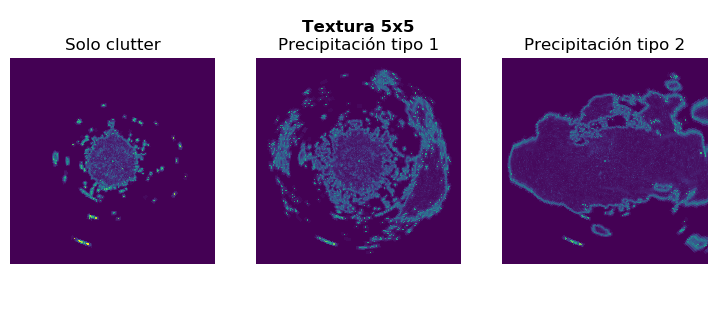

In [10]:
util.testeo_results(cluttermaps=None,results=texture5, rmax=15, title2='Textura 5x5')

Si usamos el enfoque Gabella: 

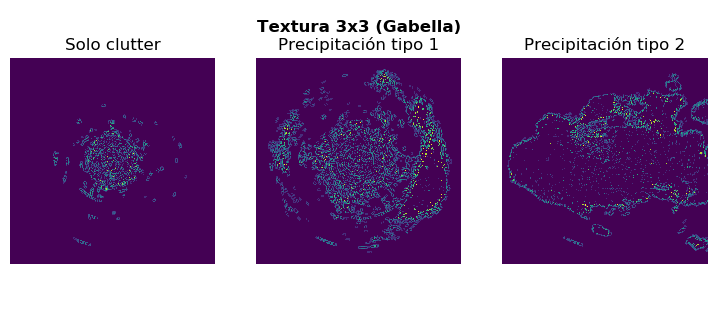

In [11]:
util.testeo_results(cluttermaps=None, results=texture3gab, rmax=15, title2='Textura 3x3 (Gabella)')

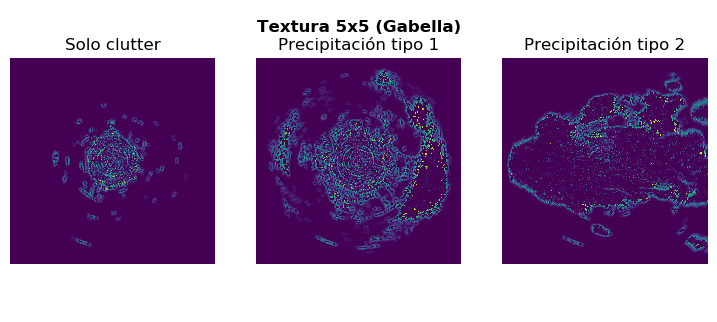

In [12]:
util.testeo_results(cluttermaps=None, results=texture5gab, rmax=15, title2='Textura 5x5 (Gabella)')

¿Qué sucede en cambio si solo consideramos la textura radial?

In [13]:
for data in datos:
    texture3azi.append(util.texture_eje(data, 1))
    texture5azi.append(util.texture_eje(data, 2))
    texture3gaba.append(util.pseudogabella_eje(data, half_wsize=1,thr=6))
    texture5gaba.append(util.pseudogabella_eje(data, half_wsize=2, thr=6))

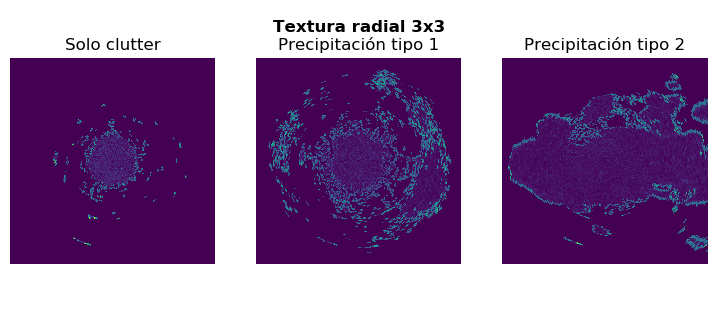

In [14]:
util.testeo_results(cluttermaps=None, results=texture3azi, rmax=15, title2='Textura radial 3x3')

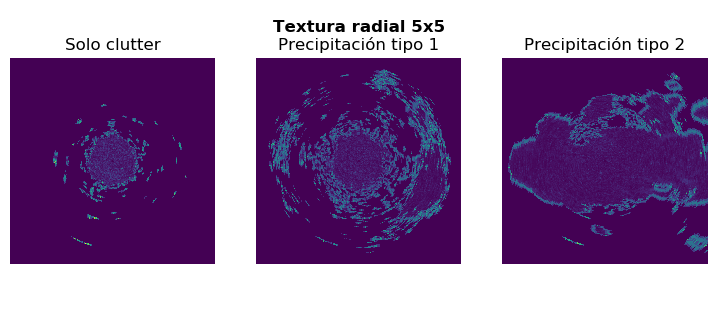

In [15]:
util.testeo_results(cluttermaps=None, results=texture5azi, rmax=15, title2='Textura radial 5x5')

Para 5x5 se ha perdido todo detalle y solo quedan los bordes. 

Mostramos la textura radial bajo el enfoque Gabella:

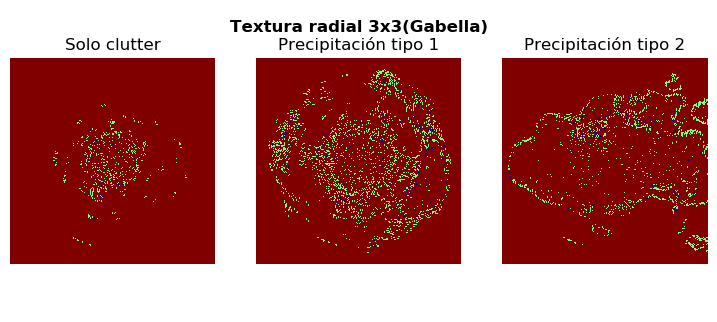

In [16]:
util.testeo_results(cluttermaps=None, results=texture3gaba, rmax=15, cmap=plt.cm.jet, title2='Textura radial 3x3(Gabella)')

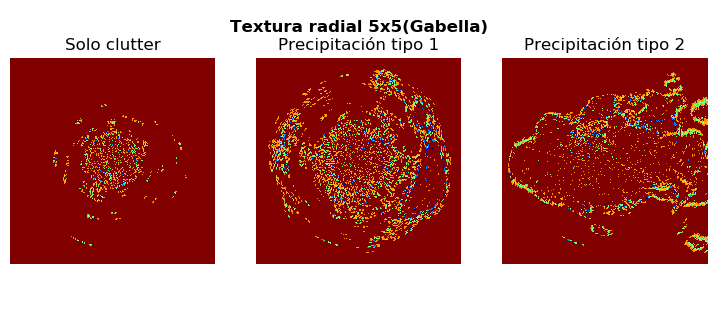

In [17]:
util.testeo_results(cluttermaps=None, results=texture5gaba, rmax=15, cmap=plt.cm.jet, title2='Textura radial 5x5(Gabella)')

Nos acercamos a la zona donde parece existir clutter en el dato "Precipitación 2"

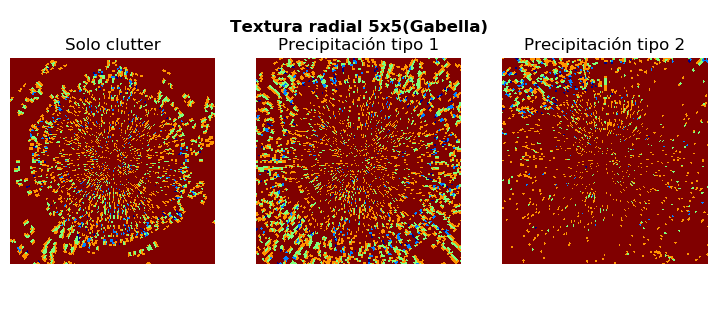

In [18]:
util.testeo_results(cluttermaps=None, results=texture5gaba, rmax=5, cmap=plt.cm.jet, title2='Textura radial 5x5(Gabella)')

Casi todas las variables han sido presentadas en su distribución espacial porque estamos especialmente interesados en el filtrado espacial de los datos. Esto nos permitirá eliminar el clutter de forma eficiente y mostrar solo la precipitación.

En el siguiente cuaderno evaluaremos una aproximación del filtrado que realiza por defecto Rainview Analyzer. 